<a href="https://colab.research.google.com/github/dsogden/Quantitative_Finance/blob/main/Mean_Reversion_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import numpy as np
import pandas as pd
import yfinance as yf
import statsmodels.tsa.stattools as ts
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
def download_stocks(ticker: str, start: str, end: str) -> pd.DataFrame:
    df = yf.download(ticker, start=start, end=end)
    df.index = pd.to_datetime(df.index)
    return df

def dickey_fuller(df: pd.DataFrame, column: str, lag: int) -> tuple:
    outputs = ts.adfuller(df[column], lag)
    return (outputs[0], outputs[1])

In [58]:
goog = download_stocks('GOOG', '2004-09-01', '2020-08-31')
tstat, pvalue = dickey_fuller(goog, 'Adj Close', 1)

alpha = 0.05
if pvalue < alpha:
    print(f'\nReject null hypothesis; there is no unit root')
else:
    print(f'\nCannot reject the null hypothesis; there is a unit root')

[*********************100%%**********************]  1 of 1 completed


Cannot reject the null hypothesis; there is a unit root


In [59]:
lags = range(2, 100)
lags

range(2, 100)

In [62]:
def hurst(ts: np.array) -> float:
    """
    Returns the Hurst Exponent of the time series vector ts

    Parameters
    ----------
    ts : `numpy.array`
        Time series upon which the Hurst Exponent will be calculated

    Returns
    -------
    'float'
        The Hurst Exponent from the poly fit output
    """
    # Create the range of lag values
    lags = [i for i in range(2, 100)]

    # Calculate the array of the variances of the lagged differences
    tau = [np.sqrt(np.std(ts[lag:] - ts[:-lag])) for lag in lags]

    # Use a linear fit to estimate the Hurst Exponent
    poly = np.polyfit(np.log(lags), np.log(tau), 1)

    # Return the Hurst exponent from the polyfit output
    return poly[0]*2.0

In [65]:
dat = np.random.randn(100_000)
gbm = np.log(np.cumsum(dat) + 1000)
mr = np.log(dat + 1000)
tr = np.log(np.cumsum(dat + 1) + 1000)

print(f'Hurst(GBM): {hurst(gbm):0.4f}')
print(f'Hurst(MR): {hurst(mr):0.4f}')
print(f'Hurst(TR): {hurst(tr):0.4f}')

Hurst(GBM): 0.4973
Hurst(MR): 0.0000
Hurst(TR): 0.9517


In [67]:
print(f'Hurst(GOOG): {hurst(goog["Adj Close"].values)}')

Hurst(GOOG): 0.4144988794714292


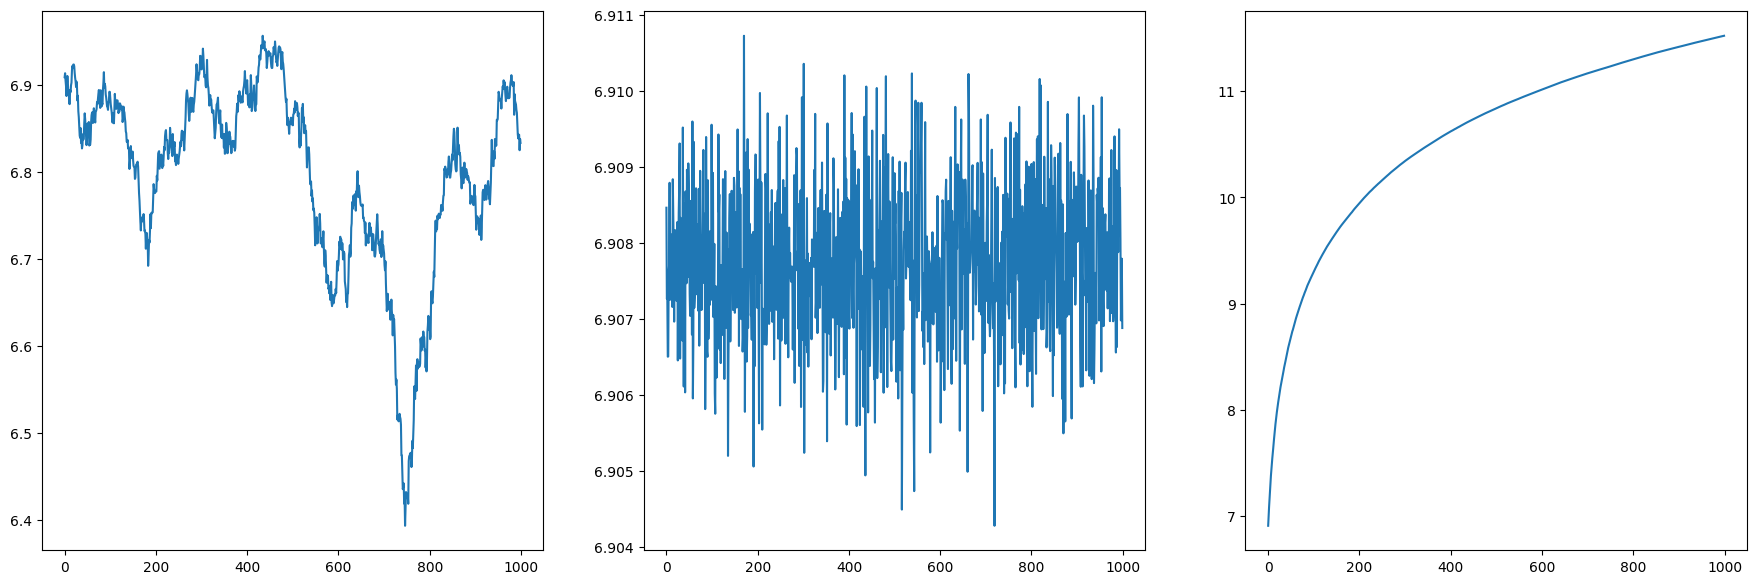

In [72]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(22, 7))
ax[0].plot(gbm[::100], label='Geometric Brownian')
ax[1].plot(mr[::100], label='Mean Reverting')
ax[2].plot(tr[::100], label='Trending')
plt.show()